In [1]:
# Code formatting
import jupyter_black
jupyter_black.load()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import MultipleLocator

In [4]:
# import os
# os.listdir("Dataset")
# uber_2024 = pd.read_csv("Dataset/ncr_ride_bookings.csv")

# Import dataset from Kaggle - Uber Ride Analytics Dataset 2024

In [5]:
# Install dependencies as needed:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ncr_ride_bookings.csv"

# Load the latest version
uber_2024 = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yashdevladdha/uber-ride-analytics-dashboard",
    file_path,
    # Provide any additional arguments like
    # sql_query or pandas_kwargs. See the
    # documenation for more information:
    # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# View the structure of the dataset

In [6]:
uber_2024.shape

(150000, 21)

In [7]:
uber_2024.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [8]:
uber_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
uber_2024.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


# Data Cleaning

In [10]:
# 1. Check data types
# 2. Check for duplicate values
# 3. Check for missing values

In [11]:
# Check data types

In [12]:
type(uber_2024)

pandas.core.frame.DataFrame

In [13]:
# Check for duplicate values

In [14]:
uber_2024.duplicated().sum()

np.int64(0)

In [15]:
uber_2024.drop_duplicates(inplace=True)

In [16]:
uber_2024.duplicated().sum()

np.int64(0)

In [17]:
# Check for missing values

In [18]:
uber_2024.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

# Data Analysis
Overview
1. Demand & Booking Performance
    - Monthly Uber Booking Volume
    - Bookings by Weekday Across Months
    - Hourly Uber Bookings by Weekday
    - Booking Results Distribution (Completed vs Cancelled vs Incomplete)
2. Booking Cancellation Analysis
    - Top Cancellation Reasons by Customers
    - Relationship between Wait Time and Cancellations
    - The top 10 Pickup Locations with the Highest Number of Incomplete Orders
3. Service Quality Analysis
    - Average VTAT and CTAT
    - Average Driver and Customer Ratings by Vehicle Type
    - Average Driver and Customer Ratings by VTAT and CTAT
3. Revenue Analysis
    - Monthly Revenue Trend
    - Revenue by Vehicle Type
    - Revenue by Ride Distance
4. Payment Behavior 


## Section 1. Demand & Booking Performance
    - Monthly Uber Booking Volume
    - Bookings by Weekday Across Months
    - Hourly Uber Bookings by Weekday
    - Booking Results Distribution (Completed vs Cancelled vs Incomplete)

# 1.1 Monthly Uber Booking Volume

In [19]:
uber_2024["Date"] = pd.to_datetime(uber_2024["Date"])
uber_2024["Month"] = uber_2024["Date"].dt.month_name()
uber_2024["Weekday"] = uber_2024["Date"].dt.day_name()
uber_2024["Time"] = pd.to_datetime(uber_2024["Time"], format="%H:%M:%S")
uber_2024["Hour"] = uber_2024["Time"].dt.hour

In [20]:
# Define month order
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

In [21]:
# Set categorical order
uber_2024["Month"] = pd.Categorical(
    uber_2024["Month"], categories=month_order, ordered=True
)

In [22]:
monthly_booking_counts = uber_2024["Month"].value_counts().reindex(month_order)

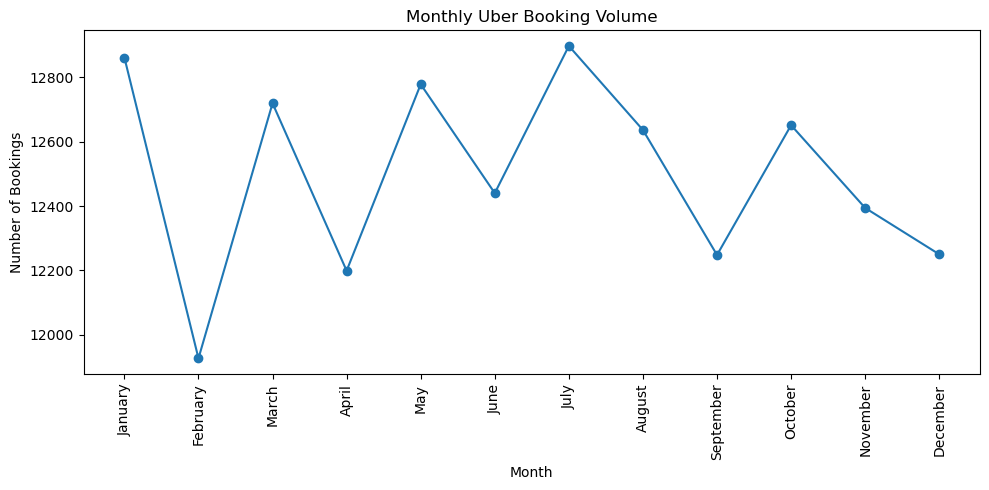

In [23]:
monthly_booking_counts.plot(
    kind="line",
    figsize=(10, 5),
    title="Monthly Uber Booking Volume",
    marker="o",
    rot=90,
)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(
    ticks=range(len(monthly_booking_counts)), labels=monthly_booking_counts.index
)
plt.tight_layout()
plt.show()

In [24]:
# Find the month with the highest number of bookings
monthly_booking_counts.idxmax()

'July'

# 1.2 Bookings by Weekday Across Months in New York City

In [25]:
weekday_booking_counts = pd.crosstab(
    index=uber_2024["Month"], columns=uber_2024["Weekday"]
)
weekday_booking_counts.style.set_caption("Bookings by Weekday Across Months")

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
January,1685,1991,1657,1729,1675,2062,2062
February,1677,1685,1614,1666,2059,1669,1557
March,2011,1655,2106,2077,1608,1644,1618
April,1639,2097,1592,1631,1592,2020,1628
May,2065,1673,1658,1625,2021,1649,2087
June,1651,1661,2134,2053,1611,1674,1656
July,1700,2055,1639,1648,1675,2071,2109
August,2022,1547,2070,1629,2007,1650,1711
September,1636,2009,1659,1957,1695,1610,1682


<Axes: title={'center': 'Bookings by Weekday Across Months'}, xlabel='Month'>

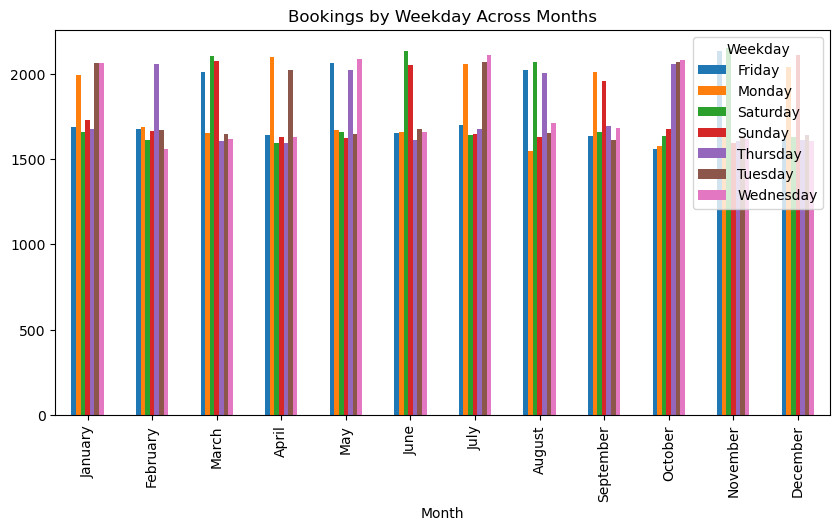

In [26]:
weekday_booking_counts.plot(
    kind="bar", figsize=(10, 5), title="Bookings by Weekday Across Months"
)

In [27]:
uber_2024["Is_Weekend"] = uber_2024["Date"].dt.weekday.isin([5, 6])

In [28]:
# Compare between Weekdays and Weekends

In [29]:
weekpart_counts = uber_2024.groupby("Is_Weekend")["Booking ID"].count()

In [30]:
weekpart_counts.index = ["Weekday", "Weekend"]

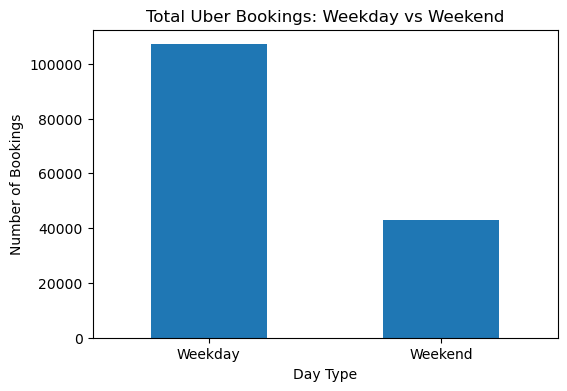

In [31]:
weekpart_counts.plot(
    kind="bar", title="Total Uber Bookings: Weekday vs Weekend", figsize=(6, 4), rot=0
)
plt.xlabel("Day Type")
plt.ylabel("Number of Bookings")
plt.show()

# 1.3 Hourly Uber Bookings by Weekday

In [32]:
hourly_weekday_counts = (
    uber_2024.groupby(["Weekday", "Hour"])["Booking ID"].count().unstack()
)

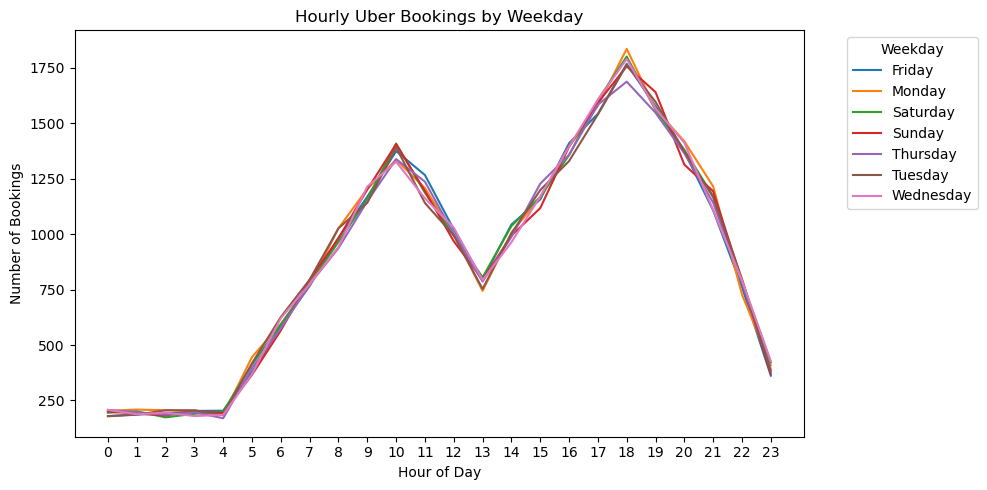

In [33]:
hourly_weekday_counts.T.plot(figsize=(10, 5), title="Hourly Uber Bookings by Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Bookings")
plt.xticks(range(24))
plt.legend(title="Weekday", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 1.4 Booking Results Distribution (Completed vs Cancelled vs Incomplete)

In [34]:
uber_2024["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [35]:
def find_booking_result(row):
    match row["Booking Status"]:
        case "Incomplete":
            return "Incomplete"
        case "Cancelled by Driver" | "Cancelled by Customer":
            return "Cancelled"
        case _:
            return "Completed"

In [36]:
uber_2024["Booking_Status"] = uber_2024.apply(find_booking_result, axis=1)

In [37]:
booking_result_counts = uber_2024["Booking_Status"].value_counts(dropna=False)
booking_result_counts

Booking_Status
Completed     103500
Cancelled      37500
Incomplete      9000
Name: count, dtype: int64

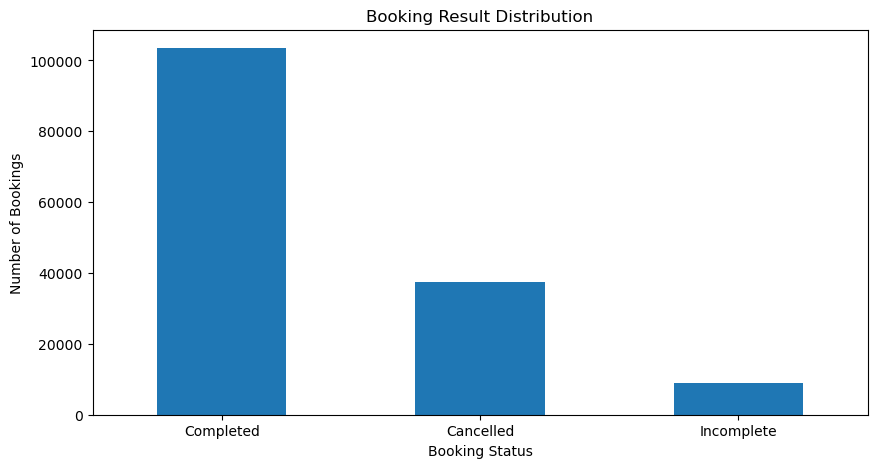

In [38]:
booking_result_counts.plot(
    kind="bar", figsize=(10, 5), title="Booking Result Distribution", rot=0
)
plt.xlabel("Booking Status")
plt.ylabel("Number of Bookings")
plt.show()

# Section 2. Booking Cancellation Analysis
    - Top Cancellation Reasons by Customers
    - Relationship between Wait Time and cancellations
    - The top 10 Pickup Locations with the Highest Number of Incomplete Orders

# 2.1 Top Cancellation Reasons by Customers

In [39]:
customer_cancel_cancel_counts = uber_2024[
    uber_2024["Booking Status"].str.lower() == "cancelled by customer"
]["Reason for cancelling by Customer"].value_counts()

customer_cancel_cancel_counts

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

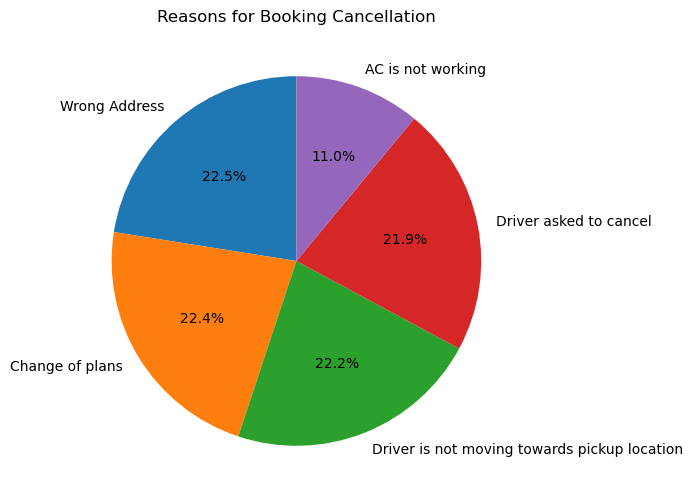

In [40]:
customer_cancel_cancel_counts.plot(
    kind="pie",
    title="Reasons for Booking Cancellation",
    figsize=(6, 6),
    autopct="%1.1f%%",
    startangle=90,
)
plt.ylabel("")
plt.show()

In [41]:
# Find the top reason for cancellation by customers
uber_2024["Reason for cancelling by Customer"].value_counts().idxmax()

'Wrong Address'

# 2.2 Relationship between Wait Time and Cancellations

In [42]:
# uber_2024["Booking Status"] = uber_2024["Booking Status"].str.strip().str.lower()

In [43]:
uber_2024["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [44]:
customer_cancel_counts = uber_2024[
    uber_2024["Booking Status"].str.lower() == "cancelled by customer"
]["Reason for cancelling by Customer"].value_counts()

customer_cancel_counts

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

In [45]:
# avg_vtat = uber_2024[uber_2024["Avg VTAT"].notna()]

In [46]:
max_avg_vtat = uber_2024["Avg VTAT"].max()

In [47]:
avg_vtat_bins = pd.cut(
    uber_2024["Avg VTAT"], bins=range(0, int(max_avg_vtat) + 5, 5), right=False
)

In [48]:
avg_customer_cancel_rate = uber_2024.groupby(avg_vtat_bins, observed=True)[
    "Booking Status"
].apply(lambda x: (x.str.lower() == "cancelled by customer").mean())

In [49]:
avg_customer_cancel_rate

Avg VTAT
[0, 5)      0.000000
[5, 10)     0.057947
[10, 15)    0.075764
[15, 20)    0.910283
Name: Booking Status, dtype: float64

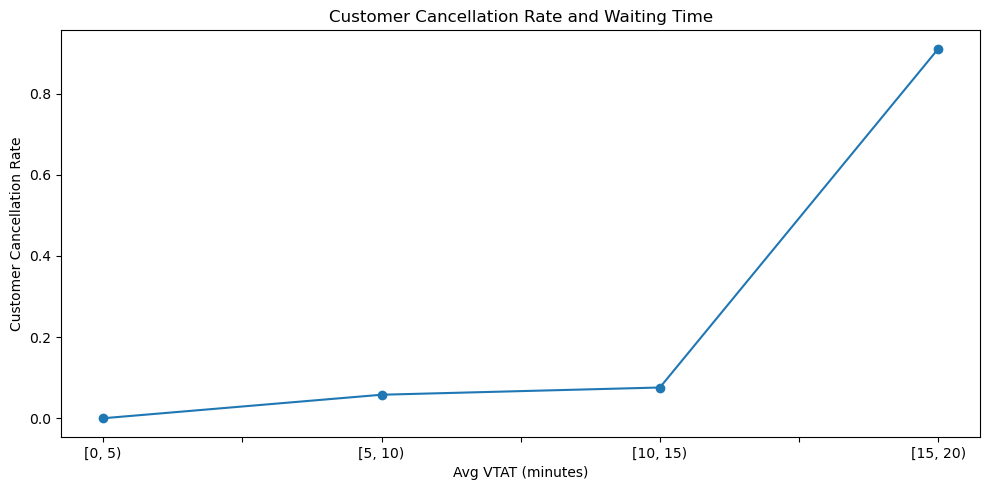

In [50]:
avg_customer_cancel_rate.plot(
    kind="line",
    marker="o",
    title="Customer Cancellation Rate and Waiting Time",
    figsize=(10, 5),
)
plt.xlabel("Avg VTAT (minutes)")
plt.ylabel("Customer Cancellation Rate")
plt.tight_layout()
plt.show()

# 2.3 The top 10 Pickup Locations with the Highest Number of Incomplete Orders

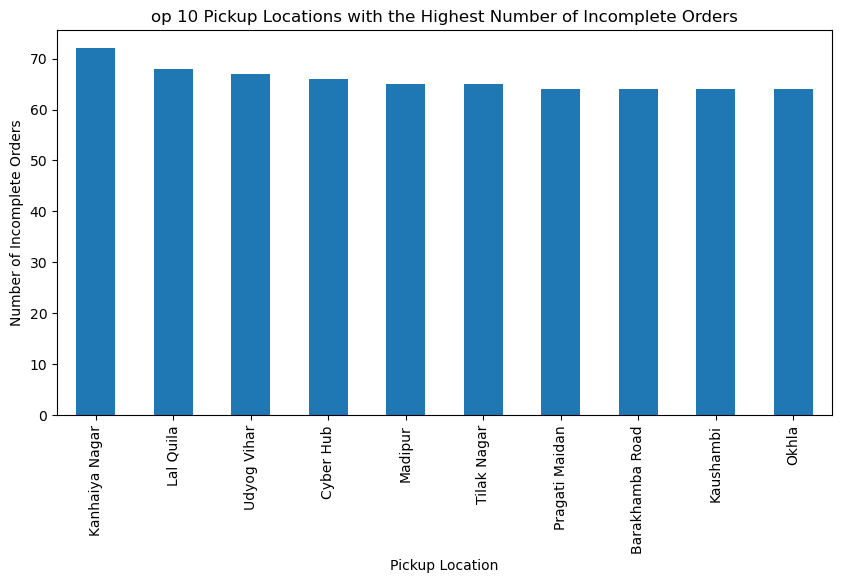

In [51]:
incomplete_pickup_counts = (
    uber_2024[uber_2024["Booking Status"].str.lower() == "incomplete"][
        "Pickup Location"
    ]
    .value_counts()
    .head(10)
)

incomplete_pickup_counts.plot(
    kind="bar",
    title="op 10 Pickup Locations with the Highest Number of Incomplete Orders",
    figsize=(10, 5),
)

plt.xlabel("Pickup Location")
plt.ylabel("Number of Incomplete Orders")
plt.xticks(rotation=90)
plt.show()

# Section 3: Service Quality Analysis  
    - Average VTAT and CTAT
    - Average Driver and Customer Ratings by Vehicle Type
    - Average Driver and Customer Ratings by VTAT and CTAT

# 3.1 Average VTAT and CTAT

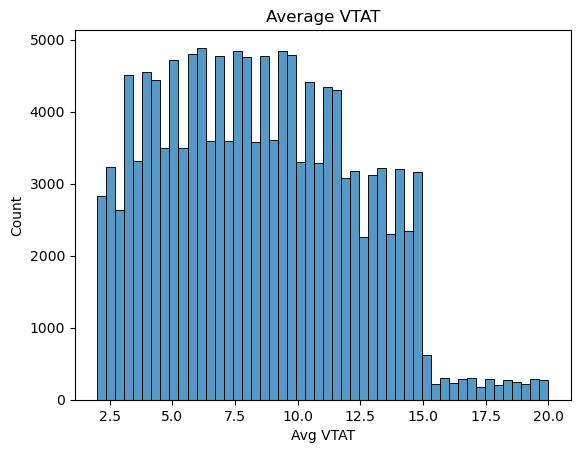

In [52]:
sns.histplot(uber_2024["Avg VTAT"], bins=50)
plt.title("Average VTAT")
plt.show()

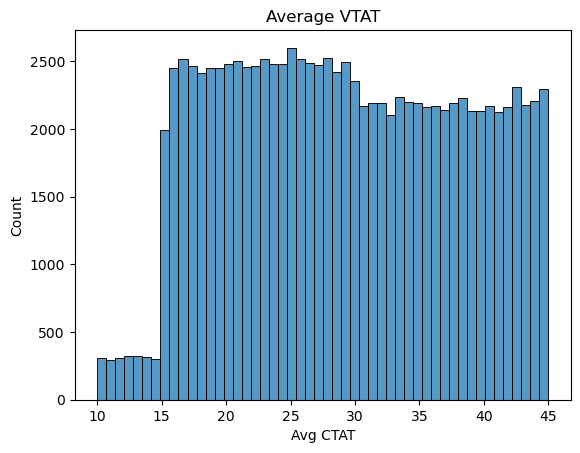

In [53]:
sns.histplot(uber_2024["Avg CTAT"], bins=50)
plt.title("Average VTAT")
plt.show()

# 3.2 Average Driver and Customer Ratings by Vehicle Type

In [54]:
avg_ratings_by_vehicle = (
    uber_2024.groupby("Vehicle Type")[["Driver Ratings", "Customer Rating"]]
    .mean()
    .sort_values("Customer Rating", ascending=False)
)

avg_ratings_by_vehicle

,Driver Ratings,Customer Rating
Vehicle Type,,
Go Sedan,4.231812,4.409996
Uber XL,4.238340,4.404851
Go Mini,4.227694,4.404297
eBike,4.225614,4.403954
Bike,4.230056,4.403940
Premier Sedan,4.234865,4.403457
Auto,4.232369,4.402000


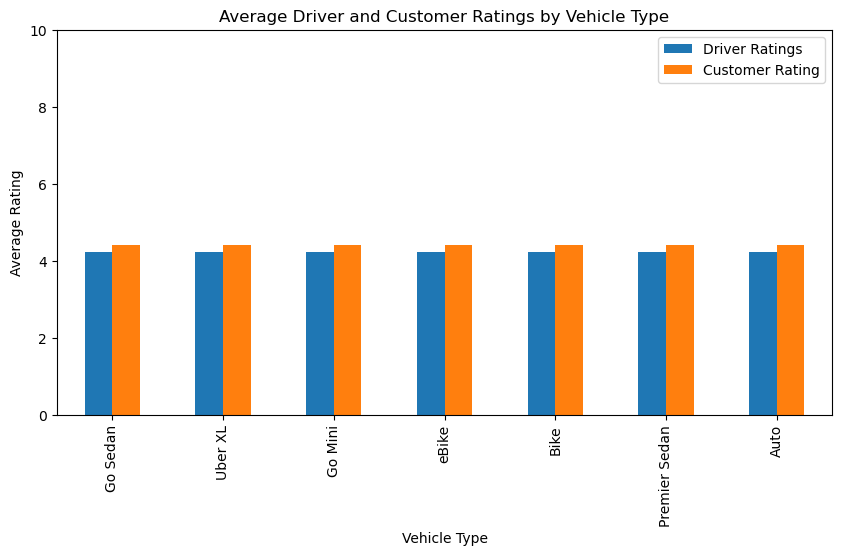

In [55]:
ax = avg_ratings_by_vehicle.plot(
    kind="bar",
    figsize=(10, 5),
    title="Average Driver and Customer Ratings by Vehicle Type",
)
ax.set_ylim(0, 10)
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

# 3.3 Average Driver and Customer Ratings by VTAT and CTAT

In [56]:
avg_ratings_by_wait_time = (
    uber_2024[uber_2024["Booking Status"].str.lower() != "no driver found"]
    .groupby("Booking Status")[["Avg VTAT", "Avg CTAT"]]
    .mean()
)
avg_ratings_by_wait_time

,Avg VTAT,Avg CTAT
Booking Status,,
Cancelled by Customer,12.512381,NaN
Cancelled by Driver,7.501952,NaN
Completed,8.511878,30.034772
Incomplete,6.013744,20.003233


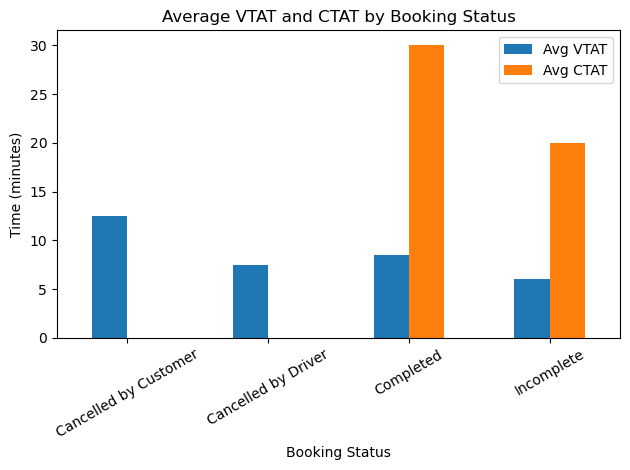

In [57]:
avg_ratings_by_wait_time.plot(
    kind="bar", title="Average VTAT and CTAT by Booking Status", rot=30
)
plt.ylabel("Time (minutes)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

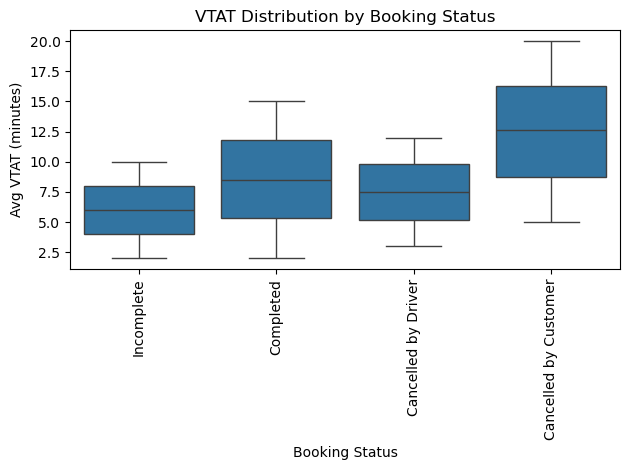

In [58]:
sns.boxplot(
    data=uber_2024[uber_2024["Booking Status"].str.lower() != "no driver found"],
    x="Booking Status",
    y="Avg VTAT",
)
plt.title("VTAT Distribution by Booking Status")
plt.xticks(rotation=90)
plt.ylabel("Avg VTAT (minutes)")
plt.tight_layout()
plt.show()

# Section 4.Revenue Analysis
    - Monthly Revenue Trend  
    - Revenue by Vehicle Type  
    - Revenue by Ride Distance

# 4.1 Monthly Revenue Trend 

In [59]:
month_revenue_count = uber_2024.groupby("Month", observed=False)["Booking Value"].sum()

month_revenue_count

Month
January      4411069.0
February     4085790.0
March        4568188.0
April        4253789.0
May          4320679.0
June         4325660.0
July         4365923.0
August       4243509.0
September    4191393.0
October      4417170.0
November     4343395.0
December     4319618.0
Name: Booking Value, dtype: float64

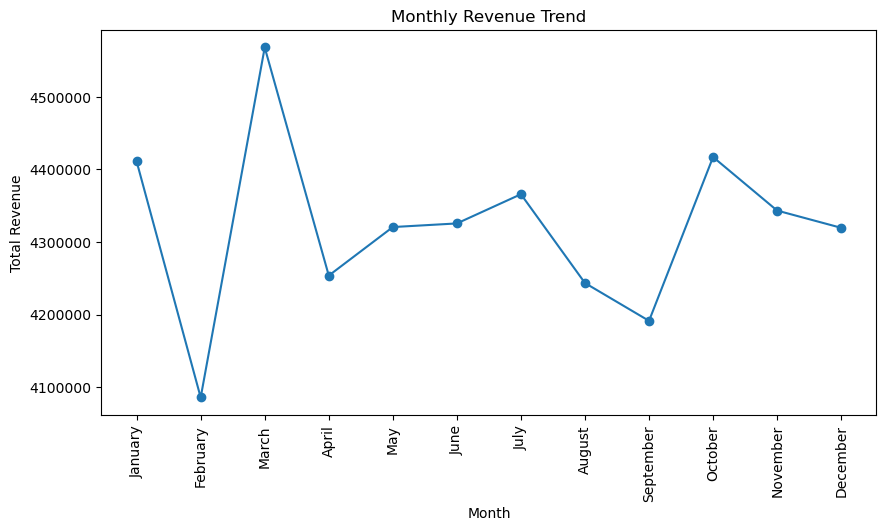

In [60]:
ax = month_revenue_count.plot(
    kind="line", marker="o", figsize=(10, 5), title="Monthly Revenue Trend", rot=90
)

ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue")
ax.ticklabel_format(style="plain", axis="y")
plt.xticks(
    ticks=range(len(monthly_booking_counts)), labels=monthly_booking_counts.index
)
plt.show()

# 4.2 Revenue by Vehicle Type

In [61]:
avg_revenue_by_vechicle = (
    uber_2024.groupby("Vehicle Type")["Booking Value"].mean().sort_values()
)
avg_revenue_by_vechicle

Vehicle Type
Uber XL          501.816749
eBike            503.897090
Auto             506.725241
Go Mini          507.684934
Premier Sedan    509.568169
Bike             510.200299
Go Sedan         511.503385
Name: Booking Value, dtype: float64

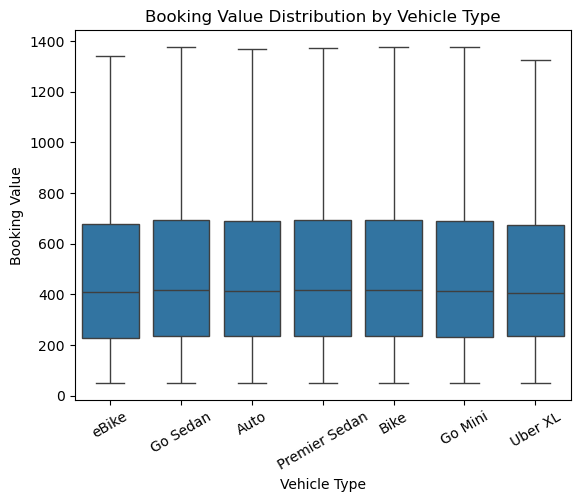

In [62]:
sns.boxplot(data=uber_2024, x="Vehicle Type", y="Booking Value", showfliers=False)
plt.title("Booking Value Distribution by Vehicle Type")
plt.xticks(rotation=30)
plt.show()

# 4.3 Revenue by Ride Distance

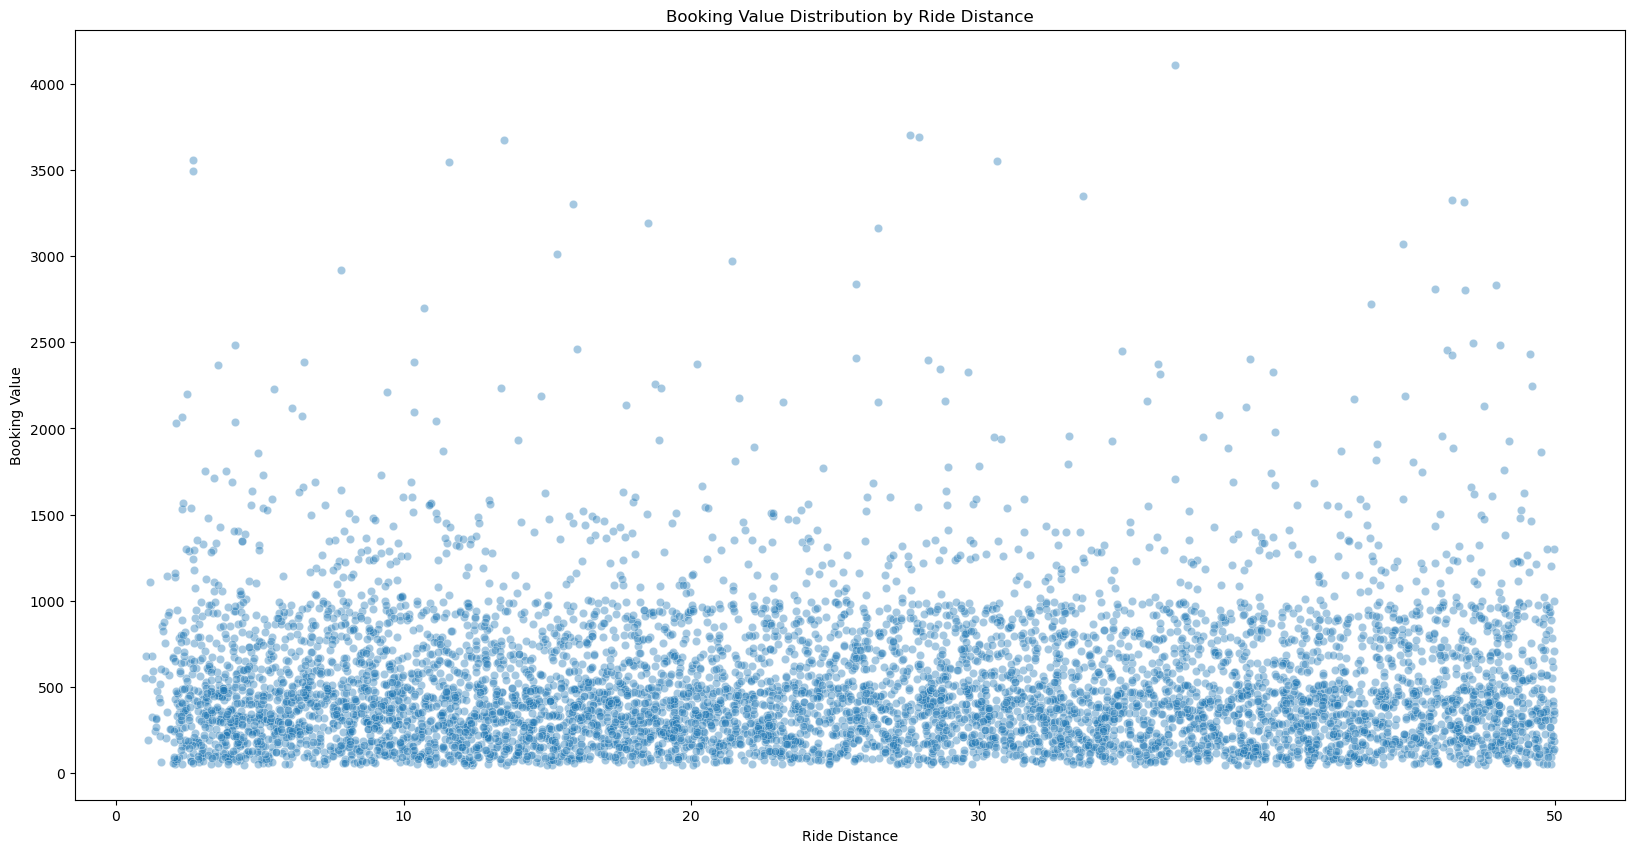

In [63]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    x="Ride Distance", y="Booking Value", data=uber_2024.sample(10000), alpha=0.4
)
plt.title("Booking Value Distribution by Ride Distance")
plt.show()